# **ChatGPT para fazer análise exploratória de dados com visualizações**

<center>
<img src="https://github.com/oceanalves/OcnDatasets/blob/main/img/OceanDS-02.png?raw=true" alt="drawing" width="550"/>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/OpenAI_Logo.svg/2560px-OpenAI_Logo.svg.png" alt="drawing" width="350"/></center>

# **O que é ChatGPT?**

**Em 30 de novembro passado estreava um programa que logo foi considerado um passo adiante no progresso da inteligência artificial: o ChatGPT.**

O sistema foi desenvolvido pela OpenAI, empresa fundada em 2015 nos EUA. O salto evolutivo desse novo sistema está no poder de gerar conteúdo de forma bastante coerente e também por conseguir "soar mais humano".

Apesar de erros e falhas ainda existentes, a capacidade já demonstrada pelo programa — e seu potencial de se desenvolver ainda mais a longo prazo — vem provocando não só admiração, mas também alguns temores.

### **Perguntas**

- Analisar dado abertos sobre acidente de transito da PRF.
- https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf

In [ ]:
# executar está célula para upoad local dos datasets
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
# upload files from Google Drive
! gdown --id 1dK28tjw_wkUsr7QUANerg4oJwNiv3rAP
! gdown --id 1sV_tdDPc4EhO-_hWZXHSt_cJpin4-6CN
! gdown --id 1eIGtDlJA_evXiVBbWY27BX6pD-CQdPi0

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1dK28tjw_wkUsr7QUANerg4oJwNiv3rAP
To: /content/acidentes2022.csv
100% 58.0M/58.0M [00:00<00:00, 160MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1sV_tdDPc4EhO-_hWZXHSt_cJpin4-6CN
To: /content/acidentes2021.csv
100% 70.9M/70.9M [00:00<00:00, 204MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google

- Escreva código python e biblioteca pandas para exploração básica de dados das visualizações de conjunto de dados acima.

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Carregando o conjunto de dados
#data = pd.read_csv("acidentes_prf.csv")

data = pd.read_csv('/content/acidentes2022.csv', sep = ';', decimal=',', encoding = 'windows-1252')

In [ ]:
# Visualizando as primeiras linhas do conjunto de dados
data.head()

id     pesid data_inversa dia_semana   horario  uf     br     km  \
0  405151  910368.0   2022-01-01     sábado  01:35:00  PI  316.0  415.0   
1  405158  906468.0   2022-01-01     sábado  02:40:00  PR  116.0   33.0   
2  405158  912108.0   2022-01-01     sábado  02:40:00  PR  116.0   33.0   
3  405172  909365.0   2022-01-01     sábado  05:22:00  MS  163.0  393.0   
4  405203  906368.0   2022-01-01     sábado  07:00:00  RJ  101.0  457.0   

               municipio                                     causa_acidente  \
0            MARCOLANDIA                   Ingestão de álcool pelo condutor   
1  CAMPINA GRANDE DO SUL                   Ingestão de álcool pelo condutor   
2  CAMPINA GRANDE DO SUL                   Ingestão de álcool pelo condutor   
3   NOVA ALVORADA DO SUL  Condutor deixou de manter distância do veículo...   
4         ANGRA DOS REIS           Reação tardia ou ineficiente do condutor   

   ...       sexo ilesos feridos_leves feridos_graves mortos   latitude  \
0  ...  Masculino      1             0              0      0  -7.432800   
1  ...   Feminino      0             0              0      1 -25.114403   
2  ...  Masculino      0             1              0      0 -25.114403   
3  ...  Masculino      1             0              0      0 -21.228445   
4  ...  Masculino      1             0              0      0 -23.031498   

   longitude regional  delegacia             uop  
0 -40.682619  SPRF-PI   DEL04-PI  UOP03-DEL04-PI  
1 -48.846755  SPRF-PR   DEL01-PR  UOP02-DEL01-PR  
2 -48.846755  SPRF-PR   DEL01-PR  UOP02-DEL01-PR  
3 -54.456296  SPRF-MS   DEL02-MS  UOP01-DEL02-MS  
4 -44.177153  SPRF-RJ   DEL03-RJ  UOP02-DEL03-RJ  

[5 rows x 35 columns]

In [ ]:
# Obtendo informações gerais sobre o conjunto de dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155049 entries, 0 to 155048
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      155049 non-null  int64  
 1   pesid                   155048 non-null  float64
 2   data_inversa            155049 non-null  object 
 3   dia_semana              155049 non-null  object 
 4   horario                 155049 non-null  object 
 5   uf                      155049 non-null  object 
 6   br                      154499 non-null  float64
 7   km                      154499 non-null  float64
 8   municipio               155049 non-null  object 
 9   causa_acidente          155049 non-null  object 
 10  tipo_acidente           155049 non-null  object 
 11  classificacao_acidente  155049 non-null  object 
 12  fase_dia                155049 non-null  object 
 13  sentido_via             155049 non-null  object 
 14  condicao_metereologi

- Como excluir colunas do dataset.

In [ ]:
data.columns

Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'id_veiculo', 'tipo_veiculo', 'marca', 'ano_fabricacao_veiculo',
       'tipo_envolvido', 'estado_fisico', 'idade', 'sexo', 'ilesos',
       'feridos_leves', 'feridos_graves', 'mortos', 'latitude', 'longitude',
       'regional', 'delegacia', 'uop'],
      dtype='object')

In [ ]:
colunas = ['id', 'pesid', 'tipo_pista', 'tracado_via', 'uso_solo',
       'id_veiculo', 'regional', 'delegacia', 'uop']

# Removendo a coluna "coluna_1"
data = data.drop(colunas, axis=1)

# Verificando o novo conjunto de dados
data.head()

data_inversa dia_semana   horario  uf     br     km              municipio  \
0   2022-01-01     sábado  01:35:00  PI  316.0  415.0            MARCOLANDIA   
1   2022-01-01     sábado  02:40:00  PR  116.0   33.0  CAMPINA GRANDE DO SUL   
2   2022-01-01     sábado  02:40:00  PR  116.0   33.0  CAMPINA GRANDE DO SUL   
3   2022-01-01     sábado  05:22:00  MS  163.0  393.0   NOVA ALVORADA DO SUL   
4   2022-01-01     sábado  07:00:00  RJ  101.0  457.0         ANGRA DOS REIS   

                                      causa_acidente     tipo_acidente  \
0                   Ingestão de álcool pelo condutor  Colisão traseira   
1                   Ingestão de álcool pelo condutor        Tombamento   
2                   Ingestão de álcool pelo condutor        Tombamento   
3  Condutor deixou de manter distância do veículo...  Colisão traseira   
4           Reação tardia ou ineficiente do condutor   Colisão frontal   

  classificacao_acidente  ... tipo_envolvido estado_fisico idade       sexo  \
0    Com Vítimas Feridas  ...       Condutor         Ileso  33.0  Masculino   
1     Com Vítimas Fatais  ...     Passageiro         Óbito  50.0   Feminino   
2     Com Vítimas Fatais  ...       Condutor  Lesões Leves  47.0  Masculino   
3    Com Vítimas Feridas  ...       Condutor         Ileso  65.0  Masculino   
4    Com Vítimas Feridas  ...       Condutor         Ileso  63.0  Masculino   

  ilesos  feridos_leves feridos_graves mortos   latitude  longitude  
0      1              0              0      0  -7.432800 -40.682619  
1      0              0              0      1 -25.114403 -48.846755  
2      0              1              0      0 -25.114403 -48.846755  
3      1              0              0      0 -21.228445 -54.456296  
4      1              0              0      0 -23.031498 -44.177153  

[5 rows x 26 columns]

In [ ]:
data.shape

(155049, 26)

In [ ]:
# Contando a quantidade de dados ausentes
data.isna().sum()

data_inversa              0
dia_semana                0
horario                   0
uf                        0
br                        0
km                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
sentido_via               0
condicao_metereologica    0
tipo_veiculo              0
marca                     0
ano_fabricacao_veiculo    0
tipo_envolvido            0
estado_fisico             0
idade                     0
sexo                      0
ilesos                    0
feridos_leves             0
feridos_graves            0
mortos                    0
latitude                  0
longitude                 0
dtype: int64

In [ ]:
# Removendo linhas com dados ausentes
data = data.dropna()

# Verificando o número de linhas restantes
print('Linhas: ', data.shape[0])

Linhas:  134373


In [ ]:
# Obtendo estatísticas descritivas para as colunas numéricas
data.describe().round(1)

br        km  ano_fabricacao_veiculo     idade    ilesos  \
count  134373.0  134373.0                134373.0  134373.0  134373.0   
mean      213.6     264.9                  2011.6      39.4       0.5   
std       130.5     227.1                     7.7      33.9       0.5   
min        10.0       0.0                  1900.0       0.0       0.0   
25%       101.0      83.0                  2008.0      28.0       0.0   
50%       163.0     201.0                  2013.0      38.0       0.0   
75%       324.0     413.0                  2018.0      49.0       1.0   
max       495.0    1304.0                  2022.0    2021.0       1.0   

       feridos_leves  feridos_graves    mortos  latitude  longitude  
count       134373.0        134373.0  134373.0  134373.0   134373.0  
mean             0.4             0.1       0.0     -19.1      -46.8  
std              0.5             0.3       0.2       7.7        6.1  
min              0.0             0.0       0.0     -33.7      -71.2  
25%              0.0             0.0       0.0     -25.4      -50.7  
50%              0.0             0.0       0.0     -20.6      -47.9  
75%              1.0             0.0       0.0     -13.3      -42.9  
max              1.0             1.0       1.0       4.5      -34.8

In [ ]:
# Contagem de valores únicos para uma coluna específica
data["tipo_veiculo"].value_counts()

Automóvel           58066
Motocicleta         25850
Caminhonete         13333
Caminhão-trator     11820
Caminhão             8850
Ônibus               5509
Motoneta             3259
Não Informado        2947
Utilitário           2325
Micro-ônibus         1300
Camioneta             858
Ciclomotor            188
Semireboque            28
Triciclo               13
Reboque                10
Trator de rodas        10
Bicicleta               5
Outros                  1
Carroça-charrete        1
Name: tipo_veiculo, dtype: int64

In [ ]:
# Contagem de valores únicos para múltiplas colunas
data[["tipo_veiculo", "uf"]].nunique()

tipo_veiculo    19
uf              27
dtype: int64

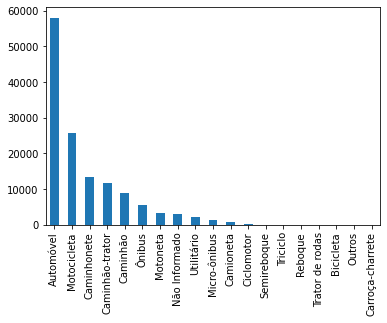

In [ ]:
# Plotando gráficos de barras para visualizar a distribuição de valores
data["tipo_veiculo"].value_counts().plot(kind="bar")

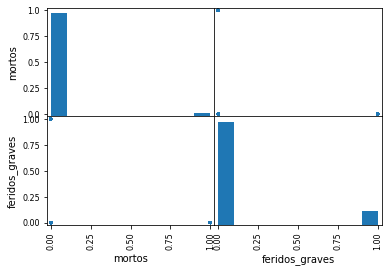

In [ ]:
# Plotando gráficos de dispersão para visualizar a relação entre duas colunas
pd.plotting.scatter_matrix(data[["mortos", "feridos_graves"]]);

- Plotar um histograma com a variável idade do dataset acima.

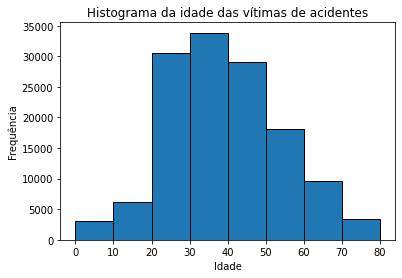

In [ ]:
# Plotando o histograma da coluna "idade"
#plt.hist(data["idade"], bins=100, edgecolor="black")
plt.hist(data["idade"], bins=8, edgecolor="black")
#plt.xlim(0, 110)

# Adicionando título e labels aos eixos
plt.title("Histograma da idade das vítimas de acidentes")
plt.xlabel("Idade")
plt.ylabel("Frequência")

# Exibindo o gráfico
plt.show()

- Plotar um gráfico de barras do matplotlib da variável sexo do dataset acima

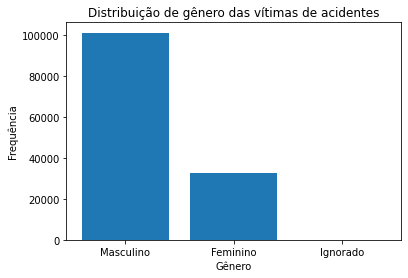

In [ ]:
# Contagem de valores únicos para a coluna "sexo"
sexo_counts = data["sexo"].value_counts()

# Plotando o gráfico de barras da coluna "sexo"
plt.bar(sexo_counts.index, sexo_counts.values)

# Adicionando título e labels aos eixos
plt.title("Distribuição de gênero das vítimas de acidentes")
plt.xlabel("Gênero")
plt.ylabel("Frequência")

# Exibindo o gráfico
plt.show()

- Plotar um gráfico de contagem do seaborn da variável mortos por sexo do dataset acima.

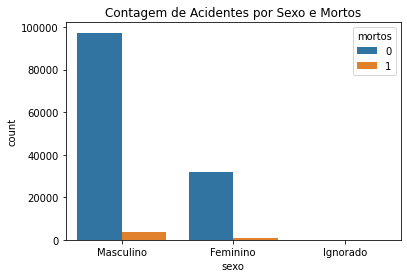

In [ ]:
# Plotando o gráfico de contagem usando o seaborn
sns.countplot(x="sexo", hue="mortos", data=data)

# Adicionando um título ao gráfico
plt.title("Contagem de Acidentes por Sexo e Mortos")

# Mostrando o gráfico
plt.show()

- Gerar um boxplot da variável idade do dataset acima.

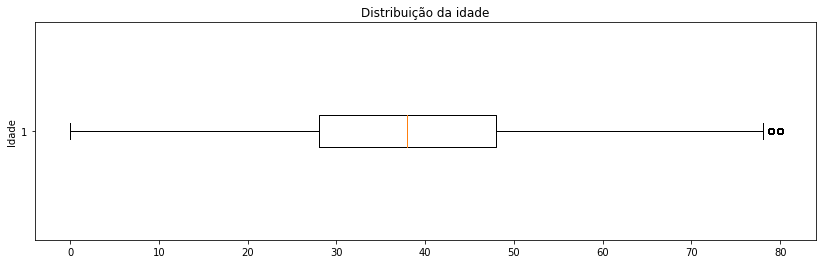

In [ ]:
# Aumentar o tamanho do gráfico
fig = plt.figure(figsize=(14, 4))

# Criando o boxplot
plt.boxplot(data["idade"], vert=False)

# Adicionando título e label ao eixo y
plt.title("Distribuição da idade")
plt.ylabel("Idade")

# Exibindo o gráfico
plt.show()

- Gerar um boxplot da variável idade por sexo do dataset acima.

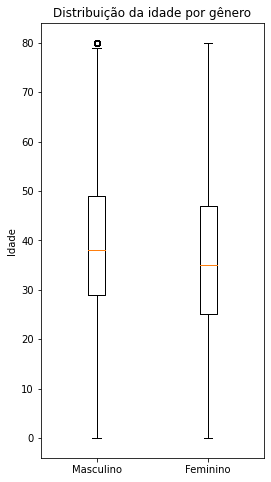

In [ ]:
# Aumentar o tamanho do gráfico
fig = plt.figure(figsize=(4, 8))

# Criando o boxplot
plt.boxplot([data[data["sexo"] == "Masculino"]["idade"],
             data[data["sexo"] == "Feminino"]["idade"]],
             labels=["Masculino", "Feminino"])

# Adicionando título e label ao eixo y
plt.title("Distribuição da idade por gênero")
plt.ylabel("Idade")

# Exibindo o gráfico
plt.show()

- Gerar um boxplot no seaborn da variável idade por sexo do dataset acima.

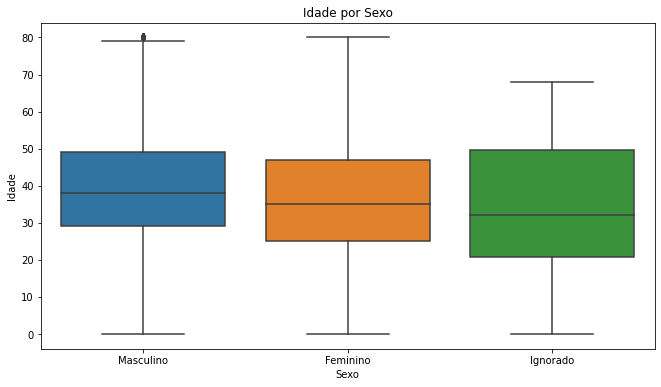

In [ ]:
# Tamanho do gráfico em polegadas
plt.figure(figsize =(11, 6))

# Plotando o boxplot
sns.boxplot(x="sexo", y="idade", data=data)

# Adicionando título e labels ao eixo
plt.title("Idade por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Idade")

# Exibindo o gráfico
plt.show()

In [ ]:
data['idade'].describe()

count    133717.000000
mean         38.616758
std          14.880919
min           0.000000
25%          28.000000
50%          38.000000
75%          48.000000
max          80.000000
Name: idade, dtype: float64

- Como calcular a media, mediana, desvio padrão e variância no pandas do dataset acima.

In [ ]:
# Calculando a média da coluna "idade"
mean = data["idade"].mean()
print("Média:", mean)

# Calculando a mediana da coluna "idade"
median = data["idade"].median()
print("Mediana:", median)

# Calculando o desvio padrão da coluna "idade"
std = data["idade"].std()
print("Desvio Padrão:", std)

# Calculando a variância da coluna "idade"
var = data["idade"].var()
print("Variância:", var)

Média: 38.61675777948952
Mediana: 38.0
Desvio Padrão: 14.880919323677345
Variância: 221.44175991779383


In [ ]:
# Convertendo a coluna "idade" para int64
data["idade"] = data["idade"].astype(int)

# Verificando o tipo da coluna "idade"
data["idade"].dtype

- Como remover valores outliers da variável idade do dataset acima.

In [ ]:
# Calculando o limite inferior e superior usando a função numpy percentile
lower_limit = np.percentile(data["idade"], q=25) - 1.5 *\
 (np.percentile(data["idade"], q=75) - np.percentile(data["idade"], q=25))

upper_limit = np.percentile(data["idade"], q=75) + 1.5 *\
 (np.percentile(data["idade"], q=75) - np.percentile(data["idade"], q=25))

# Removendo outliers
data = data[(data["idade"] > lower_limit) & (data["idade"] < upper_limit)]

# Verificando o número de linhas restantes
#print(data.shape[0])

- Criar uma correlação de heatmap entre as variáveis.

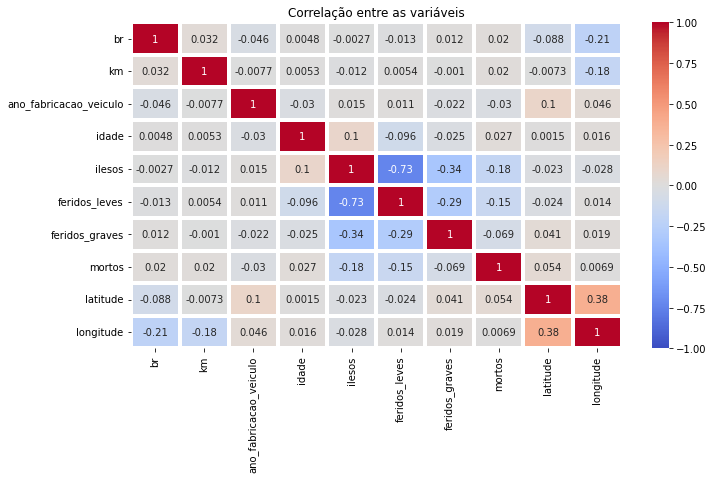

In [ ]:
# Tamanho do gráfico em polegadas
plt.figure(figsize =(11, 6))

# Removendo dados ausentes
data = data.dropna()

# Calculando a matriz de correlação
corr = data.corr()

# Plotando o heatmap
sns.heatmap(corr, annot=True, fmt='.2g', vmin=-1, vmax=1,
            cmap="coolwarm", linewidth=3, linecolor='white')

plt.title("Correlação entre as variáveis")
plt.show()

- Como filtra os dados do dataset pela variável UF.

In [ ]:
# Filtra as linhas com a coluna "UF" igual a "PI"
data_filtrado = data.query("uf == 'PI'")

# Exibindo o conjunto de dados filtrado
data_filtrado.head()

# Filtrar os dados por UF
#uf = 'PI'
#data_filtered = data.loc[data['uf'] == uf]

# Mostrar os dados filtrados
#data_filtered

data_inversa    dia_semana   horario  uf     br     km  \
0     2022-01-01        sábado  01:35:00  PI  316.0  415.0   
160   2022-01-04   terça-feira  18:50:00  PI  343.0  520.0   
161   2022-01-04   terça-feira  18:50:00  PI  343.0  520.0   
185   2022-01-05  quarta-feira  14:00:00  PI  316.0    6.1   
231   2022-01-06  quinta-feira  09:30:00  PI  135.0  541.0   

                   municipio                         causa_acidente  \
0                MARCOLANDIA       Ingestão de álcool pelo condutor   
160                 AMARANTE         Ausência de reação do condutor   
161                 AMARANTE         Ausência de reação do condutor   
185                 TERESINA  Estacionar ou parar em local proibido   
231  SAO GONCALO DO GURGUEIA   Demais falhas mecânicas ou elétricas   

          tipo_acidente classificacao_acidente  ... tipo_envolvido  \
0      Colisão traseira    Com Vítimas Feridas  ...       Condutor   
160    Colisão traseira     Com Vítimas Fatais  ...       Condutor   
161    Colisão traseira     Com Vítimas Fatais  ...       Condutor   
185  Colisão com objeto    Com Vítimas Feridas  ...       Condutor   
231          Tombamento    Com Vítimas Feridas  ...     Passageiro   

    estado_fisico idade       sexo ilesos  feridos_leves feridos_graves  \
0           Ileso  33.0  Masculino      1              0              0   
160         Óbito  44.0  Masculino      0              0              0   
161         Ileso  40.0  Masculino      1              0              0   
185         Ileso  54.0  Masculino      1              0              0   
231  Lesões Leves  26.0  Masculino      0              1              0   

    mortos   latitude  longitude  
0        0  -7.432800 -40.682619  
160      1  -6.360165 -42.794937  
161      0  -6.360165 -42.794937  
185      0  -5.147021 -42.774390  
231      0 -10.049126 -45.290053  

[5 rows x 26 columns]

- Como filtra os dez municipios com maior número de acidentes do dataset acima.

- **Brasil:**

In [ ]:
# Agrupa as linhas por município e conta o número de acidentes
acidentes_por_municipio = data.groupby("municipio").size().reset_index(name="contagem")

# Seleciona os dez municípios com o maior número de acidentes
dez_mais = acidentes_por_municipio.nlargest(10, "contagem")

# Exibindo os dez municípios com o maior número de acidentes
dez_mais

municipio  contagem
229          BRASILIA      1943
484          CURITIBA      1798
659         GUARULHOS      1595
1510         SAO JOSE      1397
516   DUQUE DE CAXIAS      1248
185             BETIM      1105
1135          PALHOCA       947
1277      PORTO VELHO       821
1587            SERRA       817
1318           RECIFE       816

- **Piauí:**

In [ ]:
# Agrupa as linhas por município e conta o número de acidentes
acidentes_por_municipioPI = data_filtrado.groupby("municipio").size().reset_index(name="contagem")

# Seleciona os dez municípios com o maior número de acidentes
dez_maisPI = acidentes_por_municipioPI.nlargest(10, "contagem")

# Exibindo os dez municípios com o maior número de acidentes
dez_maisPI

municipio  contagem
68                 TERESINA       630
54                    PICOS       171
50                 PARNAIBA       136
2                     ALTOS       116
26                 FLORIANO        84
14              CAMPO MAIOR        68
64  SAO GONCALO DO GURGUEIA        62
21           DEMERVAL LOBAO        52
48                   OEIRAS        52
22       DOM EXPEDITO LOPES        46

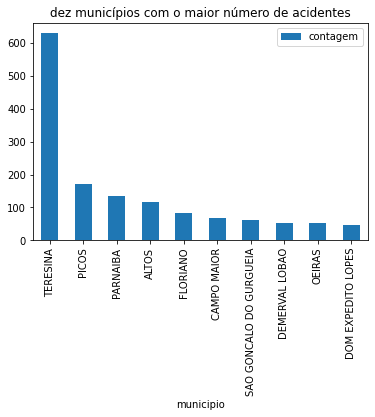

In [ ]:
dez_maisPI.plot(x='municipio', y='contagem', kind='bar')
plt.title('dez municípios com o maior número de acidentes')
plt.show()

- Agrupar os dados  e contar pela variável tipo_acidente do dataset acima.

In [ ]:
# Agrupa as linhas pelo tipo de acidente e conta o número de ocorrências de cada tipo
acidentes_por_tipo = data.groupby("tipo_acidente").size().reset_index(name="contagem")

# Exibindo os resultados
acidentes_por_tipo.sort_values('contagem', ascending=False)

tipo_acidente  contagem
8                 Colisão traseira     30866
7              Colisão transversal     18600
14       Saída de leito carroçável     17192
5    Colisão lateral mesmo sentido     14173
4                  Colisão frontal     13465
3               Colisão com objeto      7344
15                      Tombamento      7311
6   Colisão lateral sentido oposto      4947
1        Atropelamento de Pedestre      4790
10                   Engavetamento      4779
13    Queda de ocupante de veículo      3132
2                      Capotamento      2741
12                        Incêndio      1825
0          Atropelamento de Animal      1715
11                Eventos atípicos       615
9            Derramamento de carga       222

- Agrupar os dados  pelo dia_semana e usar função agg para somar os ilesos, feridos_leves, feridos_graves e mortos do dataset acima.

In [ ]:
# Agrupa as linhas pelo dia da semana e usa a função agg para somar os valores das colunas de interesse
acidentes_por_dia = data.groupby("dia_semana").agg({"ilesos": "sum",
                                                      "feridos_leves": "sum",
                                                      "feridos_graves": "sum",
                                                      "mortos": "sum"})

# Exibindo os resultados
print(acidentes_por_dia)

               ilesos  feridos_leves  feridos_graves  mortos
dia_semana                                                  
domingo         10344           8770            2941     970
quarta-feira     7744           6294            1819     541
quinta-feira     7762           6315            1835     522
segunda-feira    8329           7224            2083     596
sexta-feira     10147           7473            2504     673
sábado          10606           8530            2883     851
terça-feira      7475           6234            1785     467


- Gere o gráfico de plt.stackplot do matplotlib com os dados  pelo dia_semana e usar função agg para somar os ilesos, feridos_leves, feridos_graves e mortos do dataset acima.

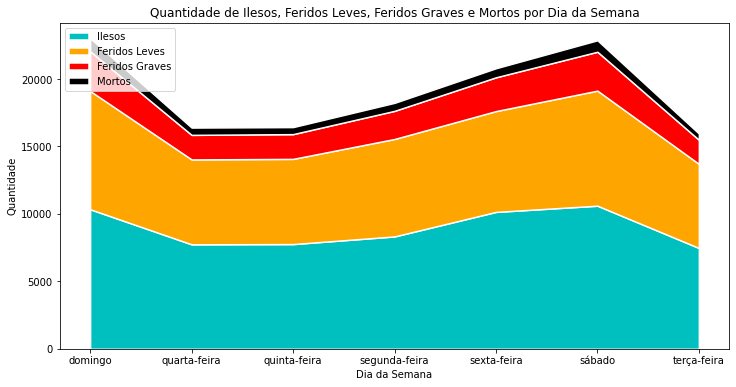

In [ ]:
# Aumentar o tamanho do gráfico
fig = plt.figure(figsize=(12, 6))

# Agrupar os dados pelo dia da semana
grouped = data.groupby(['dia_semana']).agg({'ilesos': 'sum', 'feridos_leves': 'sum',
                                            'feridos_graves': 'sum', 'mortos': 'sum'}).reset_index()

# Recuperar as colunas de dados
dias = grouped['dia_semana']
ilesos = grouped['ilesos']
feridos_leves = grouped['feridos_leves']
feridos_graves = grouped['feridos_graves']
mortos = grouped['mortos']

# Plotar o gráfico de stackplot
plt.stackplot(dias, ilesos, feridos_leves, feridos_graves, mortos,
              labels=['Ilesos', 'Feridos Leves', 'Feridos Graves', 'Mortos'],
              colors =['c', 'orange', 'red', 'black'],
              lw=1.5, edgecolor='white')

plt.legend(loc='upper left')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade')
plt.title('Quantidade de Ilesos, Feridos Leves, Feridos Graves e Mortos por Dia da Semana')
plt.show()

- Ordenar as colunas do gráfico stackplot dia_semana de domingo a sábado.

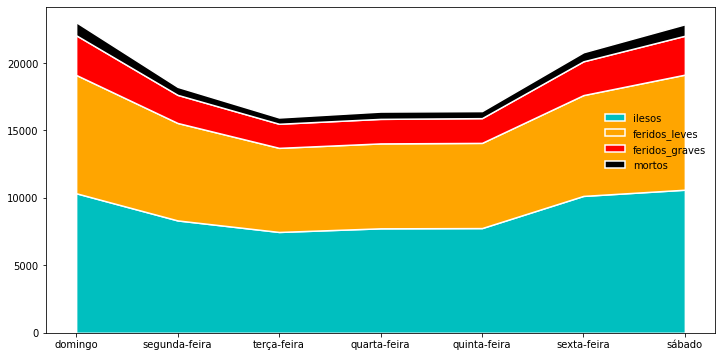

In [ ]:
# Aumentar o tamanho do gráfico
fig = plt.figure(figsize=(12, 6))

df_agrupado = data.groupby(['dia_semana'])['ilesos', 'feridos_leves', 'feridos_graves', 'mortos'].agg('sum')

# Ordenar o dataframe
df_agrupado = df_agrupado.reindex(['domingo', 'segunda-feira', 'terça-feira', 'quarta-feira',
                                   'quinta-feira', 'sexta-feira', 'sábado'],)

# Plotar o gráfico stackplot
plt.stackplot(df_agrupado.index, df_agrupado['ilesos'], df_agrupado['feridos_leves'],
              df_agrupado['feridos_graves'], df_agrupado['mortos'],
              labels=['ilesos', 'feridos_leves', 'feridos_graves', 'mortos'],
              colors =['c', 'orange', 'red', 'black'],
              lw=1.5, edgecolor='white')

# Adicionar legenda
#plt.legend(loc='upper left')
plt.legend(frameon=False, bbox_to_anchor = (1.0, 0.7))

# Mostrar o gráfico
plt.show()

- **Gráfico para o PI**

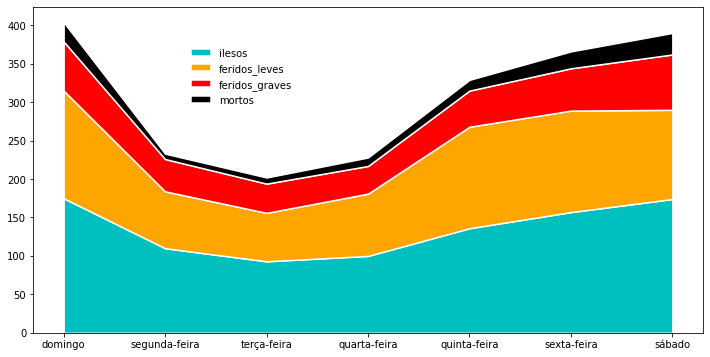

In [ ]:
# Aumentar o tamanho do gráfico
fig = plt.figure(figsize=(12, 6))

df_agrupado = data_filtrado.groupby(['dia_semana'])['ilesos', 'feridos_leves', 'feridos_graves', 'mortos'].agg('sum')

# Ordenar o dataframe
df_agrupado = df_agrupado.reindex(['domingo', 'segunda-feira', 'terça-feira', 'quarta-feira',
                                   'quinta-feira', 'sexta-feira', 'sábado'],)

# Plotar o gráfico stackplot
plt.stackplot(df_agrupado.index, df_agrupado['ilesos'], df_agrupado['feridos_leves'],
              df_agrupado['feridos_graves'], df_agrupado['mortos'],
              labels=['ilesos', 'feridos_leves', 'feridos_graves', 'mortos'],
              colors =['c', 'orange', 'red', 'black'],
              lw=1.5, edgecolor='white')

# Adicionar legenda
#plt.legend(loc='upper left')
plt.legend(frameon=False, bbox_to_anchor = (.4, 0.9))

# Mostrar o gráfico
plt.show()

**Mapa**

- Criando um mapa dos acidentes por idade com plotly.express para o dataset acima.

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter_mapbox(data_filtrado, lat="latitude", lon="longitude", color="idade", size="idade",
                     color_continuous_scale=px.colors.sequential.Plasma, size_max=15,
                     mapbox_style="open-street-map", opacity=0.7,
                     title='<b>Piauí</b> - Acidentes por idade')
fig.show()

In [ ]:
# Supondo que sua coluna de latitude seja "latitude" e a coluna de longitude seja "longitude"
fig = px.scatter_mapbox(data_filtrado, lat="latitude", lon="longitude", color="idade", size="idade",
                       color_continuous_scale=px.colors.cyclical.IceFire, #.sequential.Plasma,
                       size_max=15, mapbox_style="open-street-map", zoom=10,#opacity=0.7, zoom=10)
                       title='<b>Piauí</b> - Acidentes por idade')

fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(data, lat="latitude", lon="longitude", color="idade",
                        color_continuous_scale=px.colors.sequential.Plasma,
                        size="idade", size_max=15, mapbox_style="open-street-map",
                        hover_name="municipio", hover_data=["idade"],
                        zoom=3)

fig.show()

**Parte 2**

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# upload files from Google Drive
! gdown --id 1dK28tjw_wkUsr7QUANerg4oJwNiv3rAP
! gdown --id 1sV_tdDPc4EhO-_hWZXHSt_cJpin4-6CN
! gdown --id 1eIGtDlJA_evXiVBbWY27BX6pD-CQdPi0

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1dK28tjw_wkUsr7QUANerg4oJwNiv3rAP
To: /content/acidentes2022.csv
100% 58.0M/58.0M [00:00<00:00, 273MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1sV_tdDPc4EhO-_hWZXHSt_cJpin4-6CN
To: /content/acidentes2021.csv
100% 70.9M/70.9M [00:00<00:00, 264MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google

In [ ]:
# Carregando o conjunto de dados

data22 = pd.read_csv('/content/acidentes2022.csv', sep = ';', decimal=',', encoding = 'windows-1252')
data21 = pd.read_csv('/content/acidentes2021.csv', sep = ';', decimal=',', encoding = 'windows-1252')
data20 = pd.read_csv('/content/acidentes2020.csv', sep = ';', decimal=',', encoding = 'windows-1252')

- Como concatenar datasets no pandas.

In [ ]:
data = pd.concat([data22, data21, data20], axis=0, join='inner')

In [ ]:
data.head()

id     pesid data_inversa dia_semana   horario  uf     br     km  \
0  405151.0  910368.0   2022-01-01     sábado  01:35:00  PI  316.0  415.0   
1  405158.0  906468.0   2022-01-01     sábado  02:40:00  PR  116.0   33.0   
2  405158.0  912108.0   2022-01-01     sábado  02:40:00  PR  116.0   33.0   
3  405172.0  909365.0   2022-01-01     sábado  05:22:00  MS  163.0  393.0   
4  405203.0  906368.0   2022-01-01     sábado  07:00:00  RJ  101.0  457.0   

               municipio                                     causa_acidente  \
0            MARCOLANDIA                   Ingestão de álcool pelo condutor   
1  CAMPINA GRANDE DO SUL                   Ingestão de álcool pelo condutor   
2  CAMPINA GRANDE DO SUL                   Ingestão de álcool pelo condutor   
3   NOVA ALVORADA DO SUL  Condutor deixou de manter distância do veículo...   
4         ANGRA DOS REIS           Reação tardia ou ineficiente do condutor   

   ...       sexo ilesos feridos_leves feridos_graves mortos   latitude  \
0  ...  Masculino      1             0              0      0    -7.4328   
1  ...   Feminino      0             0              0      1 -25.114403   
2  ...  Masculino      0             1              0      0 -25.114403   
3  ...  Masculino      1             0              0      0 -21.228445   
4  ...  Masculino      1             0              0      0 -23.031498   

   longitude regional  delegacia             uop  
0 -40.682619  SPRF-PI   DEL04-PI  UOP03-DEL04-PI  
1 -48.846755  SPRF-PR   DEL01-PR  UOP02-DEL01-PR  
2 -48.846755  SPRF-PR   DEL01-PR  UOP02-DEL01-PR  
3 -54.456296  SPRF-MS   DEL02-MS  UOP01-DEL02-MS  
4 -44.177153  SPRF-RJ   DEL03-RJ  UOP02-DEL03-RJ  

[5 rows x 35 columns]

In [ ]:
colunas = ['id', 'pesid', 'tipo_pista', 'tracado_via', 'uso_solo',
       'id_veiculo', 'regional', 'delegacia', 'uop']

# Removendo a coluna "colunas"
data = data.drop(colunas, axis=1)

# Verificando o novo conjunto de dados
data.head()

data_inversa dia_semana   horario  uf     br     km              municipio  \
0   2022-01-01     sábado  01:35:00  PI  316.0  415.0            MARCOLANDIA   
1   2022-01-01     sábado  02:40:00  PR  116.0   33.0  CAMPINA GRANDE DO SUL   
2   2022-01-01     sábado  02:40:00  PR  116.0   33.0  CAMPINA GRANDE DO SUL   
3   2022-01-01     sábado  05:22:00  MS  163.0  393.0   NOVA ALVORADA DO SUL   
4   2022-01-01     sábado  07:00:00  RJ  101.0  457.0         ANGRA DOS REIS   

                                      causa_acidente     tipo_acidente  \
0                   Ingestão de álcool pelo condutor  Colisão traseira   
1                   Ingestão de álcool pelo condutor        Tombamento   
2                   Ingestão de álcool pelo condutor        Tombamento   
3  Condutor deixou de manter distância do veículo...  Colisão traseira   
4           Reação tardia ou ineficiente do condutor   Colisão frontal   

  classificacao_acidente  ... tipo_envolvido estado_fisico idade       sexo  \
0    Com Vítimas Feridas  ...       Condutor         Ileso  33.0  Masculino   
1     Com Vítimas Fatais  ...     Passageiro         Óbito  50.0   Feminino   
2     Com Vítimas Fatais  ...       Condutor  Lesões Leves  47.0  Masculino   
3    Com Vítimas Feridas  ...       Condutor         Ileso  65.0  Masculino   
4    Com Vítimas Feridas  ...       Condutor         Ileso  63.0  Masculino   

  ilesos  feridos_leves feridos_graves mortos   latitude  longitude  
0      1              0              0      0    -7.4328 -40.682619  
1      0              0              0      1 -25.114403 -48.846755  
2      0              1              0      0 -25.114403 -48.846755  
3      1              0              0      0 -21.228445 -54.456296  
4      1              0              0      0 -23.031498 -44.177153  

[5 rows x 26 columns]

In [ ]:
# Removendo linhas com dados ausentes
data = data.dropna()

# Verificando o número de linhas restantes
print('Linhas: ', data.shape[0])

Linhas:  392591


In [ ]:
data.shape

(392591, 26)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392591 entries, 0 to 147743
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   data_inversa            392591 non-null  object 
 1   dia_semana              392591 non-null  object 
 2   horario                 392591 non-null  object 
 3   uf                      392591 non-null  object 
 4   br                      392591 non-null  float64
 5   km                      392591 non-null  float64
 6   municipio               392591 non-null  object 
 7   causa_acidente          392591 non-null  object 
 8   tipo_acidente           392591 non-null  object 
 9   classificacao_acidente  392591 non-null  object 
 10  fase_dia                392591 non-null  object 
 11  sentido_via             392591 non-null  object 
 12  condicao_metereologica  392591 non-null  object 
 13  tipo_veiculo            392591 non-null  object 
 14  marca               

In [ ]:
data['idade'].describe()

count    390261.000000
mean         38.105819
std          14.601820
min           0.000000
25%          27.000000
50%          37.000000
75%          48.000000
max          79.000000
Name: idade, dtype: float64

In [ ]:
# Calculando o limite inferior e superior usando a função numpy percentile
lower_limit = np.percentile(data["idade"], q=25) - 1.5 *\
 (np.percentile(data["idade"], q=75) - np.percentile(data["idade"], q=25))

upper_limit = np.percentile(data["idade"], q=75) + 1.5 *\
 (np.percentile(data["idade"], q=75) - np.percentile(data["idade"], q=25))

# Removendo outliers
data = data[(data["idade"] > lower_limit) & (data["idade"] < upper_limit)]

# Verificando o número de linhas restantes
#print(data.shape[0])

- Criar a coluna ano a partir da variável data_inversa do tipo object do dataset.

In [ ]:
data['data_inversa'] = pd.to_datetime(data['data_inversa'])
data['ano'] = data['data_inversa'].dt.year
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390261 entries, 0 to 147743
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   data_inversa            390261 non-null  datetime64[ns]
 1   dia_semana              390261 non-null  object        
 2   horario                 390261 non-null  object        
 3   uf                      390261 non-null  object        
 4   br                      390261 non-null  float64       
 5   km                      390261 non-null  float64       
 6   municipio               390261 non-null  object        
 7   causa_acidente          390261 non-null  object        
 8   tipo_acidente           390261 non-null  object        
 9   classificacao_acidente  390261 non-null  object        
 10  fase_dia                390261 non-null  object        
 11  sentido_via             390261 non-null  object        
 12  condicao_metereologica  390261

In [ ]:
data.columns

Index(['data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio',
       'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia',
       'sentido_via', 'condicao_metereologica', 'tipo_veiculo', 'marca',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade',
       'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'ano'],
      dtype='object')

- Totaliza a variável mortos pela coluna ano do dataset.

In [ ]:
# Supondo que o seu dataset esteja armazenado na variável "data"
data['ano'] = pd.to_datetime(data['data_inversa'], format='%d/%m/%Y').dt.year

#total_mortos_por_ano = data.groupby(['ano'])['mortos'].sum()
total_mortos_por_ano = data.groupby(['ano'])['ilesos', 'feridos_leves', 'feridos_graves', 'mortos'].sum()
print(total_mortos_por_ano)

      ilesos  feridos_leves  feridos_graves  mortos
ano                                                
2020   57419          50316           14848    4432
2021   59794          50011           15387    4487
2022   62355          50774           15829    4609


- Criando uma tabela com a variavel tipo_acidente e a colunas dia_semana.

In [ ]:
# Criar a tabela pivot
table = data.pivot_table(index='tipo_acidente', columns='dia_semana', values='mortos', #['ilesos', 'mortos'],
                         aggfunc='sum', margins = True,  margins_name= "Total")

table = table.reset_index().rename_axis(None, axis=1)

# Mostrar a tabela pivot
table = table[['tipo_acidente',	'domingo', 'sábado', 'segunda-feira', 'terça-feira', 'quarta-feira',	'quinta-feira', 'sexta-feira']]
table

tipo_acidente  domingo  sábado  segunda-feira  \
0           Atropelamento de Animal       44      37             27   
1         Atropelamento de Pedestre      220     238            170   
2                       Capotamento       49      22             27   
3                Colisão com objeto      122     133             76   
4   Colisão com objeto em movimento        1       1              3   
5       Colisão com objeto estático       74      57             30   
6                   Colisão frontal     1068     899            576   
7                   Colisão lateral       46      52             24   
8     Colisão lateral mesmo sentido       42      46             35   
9    Colisão lateral sentido oposto       63      72             55   
10              Colisão transversal      187     160            131   
11                 Colisão traseira      289     221            165   
12                  Danos eventuais        1       0              0   
13            Derramamento de carga        0       1              3   
14                    Engavetamento        1       1              8   
15                 Eventos atípicos        5       6              6   
16                         Incêndio        0       1              0   
17     Queda de ocupante de veículo       61      45             17   
18        Saída de leito carroçável      464     395            236   
19                       Tombamento      133     124             78   
20                            Total     2870    2511           1667   

    terça-feira  quarta-feira  quinta-feira  sexta-feira  
0            14            23            23           24  
1           142           168           162          200  
2            24            18            32           30  
3            51            35            61           75  
4             0             1             1            0  
5            18            32            28           42  
6           460           454           497          699  
7            32            35            22           49  
8            46            49            38           50  
9            33            36            42           35  
10           85           134           135          146  
11          165           171           186          246  
12            0             1             0            1  
13            4             4             3            1  
14            6            16            13           19  
15            3             5             2            5  
16            0             1             0            1  
17           22            15            25           25  
18          220           203           204          232  
19           82           112            96          110  
20         1407          1513          1570         1990

Abraços,

<mark>Professor **OCEAN** Alves</mark>